# Importing The Required Dependencies

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data collection & Processing


In [3]:
  # The data from csv file 
df = pd.read_csv('C:/Users/Dell/Desktop/tested.csv')

In [78]:
# the first 5 rows of the DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [79]:
# Total number of rows and columns
df.shape

(418, 12)

In [80]:
# Basic info of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [81]:
# To describe the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [82]:
# check the number of missing values in column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [83]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,7.8292,NaN,Q
1,1,3,female,47.0,1,0,7.0000,NaN,S
2,0,2,male,62.0,0,0,9.6875,NaN,Q
3,0,3,male,27.0,0,0,8.6625,NaN,S
4,1,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,NaN,S
414,1,1,female,39.0,0,0,108.9000,C105,C
415,0,3,male,38.5,0,0,7.2500,NaN,S
416,0,3,male,NaN,0,0,8.0500,NaN,S


In [84]:
df['Sex'].replace({'male':0, 'female':1}, inplace = True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,34.5,0,0,7.8292,NaN,Q
1,1,3,1,47.0,1,0,7.0000,NaN,S
2,0,2,0,62.0,0,0,9.6875,NaN,Q
3,0,3,0,27.0,0,0,8.6625,NaN,S
4,1,3,1,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,0,3,0,NaN,0,0,8.0500,NaN,S
414,1,1,1,39.0,0,0,108.9000,C105,C
415,0,3,0,38.5,0,0,7.2500,NaN,S
416,0,3,0,NaN,0,0,8.0500,NaN,S


In [85]:
df['Embarked'].replace({'S':0, 'C':1, 'Q':2}, inplace = True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,34.5,0,0,7.8292,NaN,2
1,1,3,1,47.0,1,0,7.0000,NaN,0
2,0,2,0,62.0,0,0,9.6875,NaN,2
3,0,3,0,27.0,0,0,8.6625,NaN,0
4,1,3,1,22.0,1,1,12.2875,NaN,0
...,...,...,...,...,...,...,...,...,...
413,0,3,0,NaN,0,0,8.0500,NaN,0
414,1,1,1,39.0,0,0,108.9000,C105,1
415,0,3,0,38.5,0,0,7.2500,NaN,0
416,0,3,0,NaN,0,0,8.0500,NaN,0


# Handling the missing values

In [86]:
# Number of null values in column
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [87]:
# To Drop the cabin column 
df = df.drop(['Cabin'], axis = 1)


In [88]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,2
1,1,3,1,47.0,1,0,7.0000,0
2,0,2,0,62.0,0,0,9.6875,2
3,0,3,0,27.0,0,0,8.6625,0
4,1,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,0,3,0,NaN,0,0,8.0500,0
414,1,1,1,39.0,0,0,108.9000,1
415,0,3,0,38.5,0,0,7.2500,0
416,0,3,0,NaN,0,0,8.0500,0


In [89]:
# fill missing age values with the media age
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [90]:
# fill missing fare values with the media Fare
df['Fare'].fillna(df['Fare'].mean(), inplace = True)

In [91]:
# fill missing ebbarked values with the common value
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [92]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [93]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.50000,0,0,7.8292,2
1,1,3,1,47.00000,1,0,7.0000,0
2,0,2,0,62.00000,0,0,9.6875,2
3,0,3,0,27.00000,0,0,8.6625,0
4,1,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,0,3,0,30.27259,0,0,8.0500,0
414,1,1,1,39.00000,0,0,108.9000,1
415,0,3,0,38.50000,0,0,7.2500,0
416,0,3,0,30.27259,0,0,8.0500,0


# Splitting the Data

In [94]:
# split the data into input feature (x) and (y)
X = df.drop(['Survived'], axis = 1)
Y = df['Survived']

In [95]:
# Splitting the dateset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [96]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


In [97]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          80
SibSp         7
Parch         8
Fare        170
Embarked      3
dtype: int64

# Data Visualization

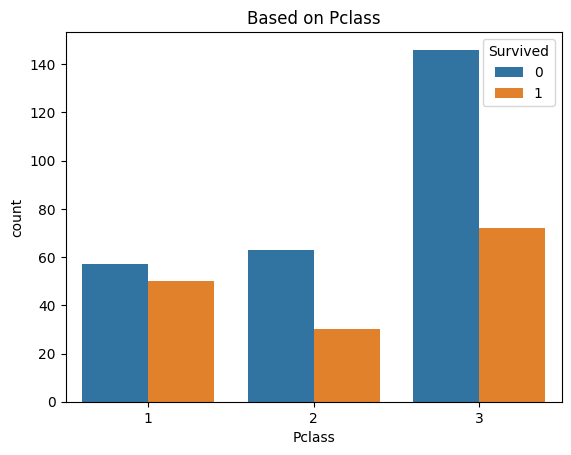

In [98]:
# Survival based on Pclass
sns.countplot(x = 'Pclass', hue='Survived', data = df)
plt.title('Based on Pclass')
plt.show()

In [99]:
df['Sex'].value_counts()

0    266
1    152
Name: Sex, dtype: int64

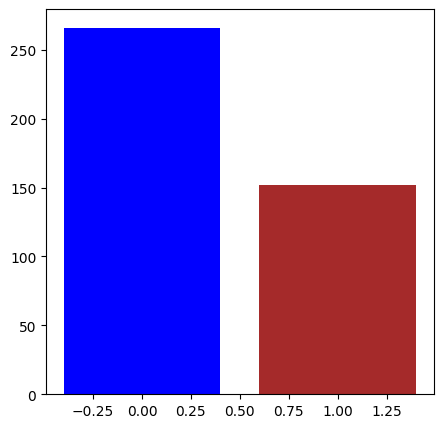

In [100]:
plt.figure(figsize=(5,5))
plt.bar(list(df['Sex'].value_counts().keys()),list(df['Sex'].value_counts()),color=["blue","brown","green"])
plt.show()

In [101]:
df['Embarked'].value_counts()

0    270
1    102
2     46
Name: Embarked, dtype: int64

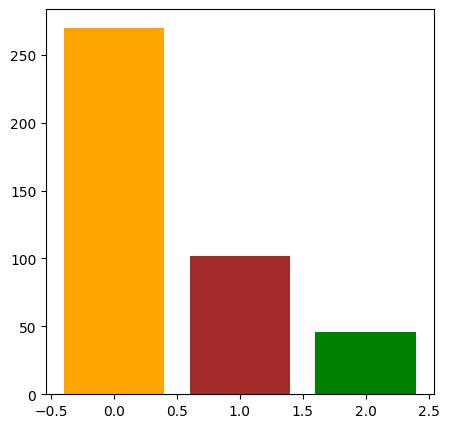

In [102]:
plt.figure(figsize=(5,5))
plt.bar(list(df['Embarked'].value_counts().keys()),list(df['Embarked'].value_counts()),color=["Orange","brown","green"])
plt.show()

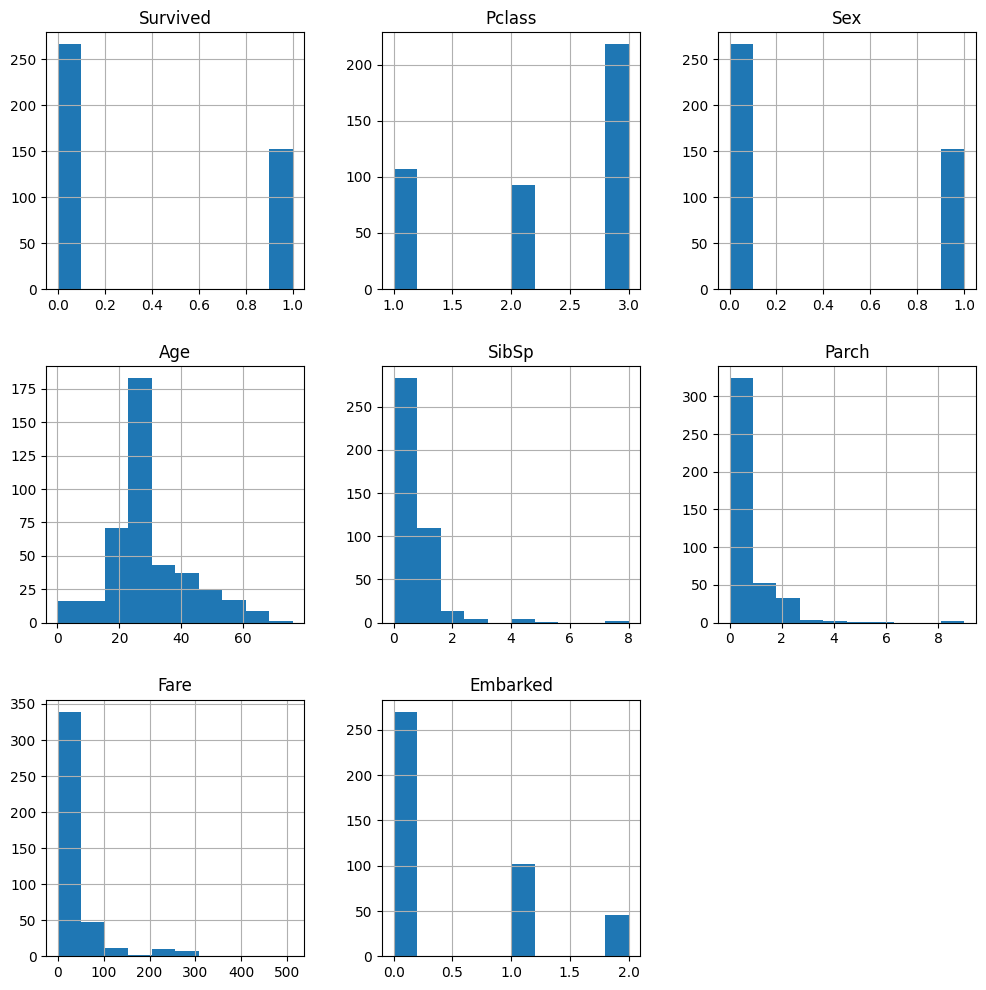

In [103]:
df.hist(figsize=(12,12))
plt.show()

# Gender Distribution

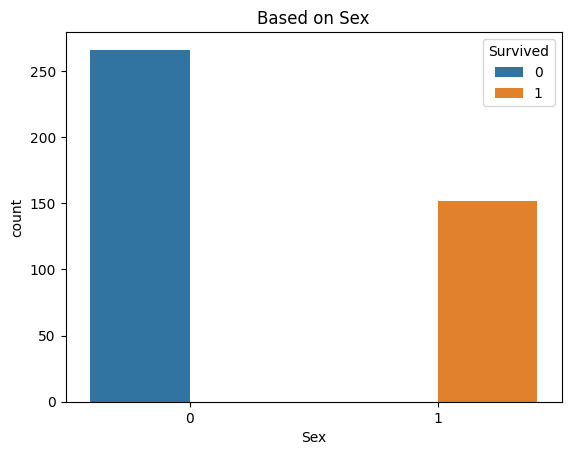

In [104]:
sns.countplot(x = 'Sex', hue='Survived', data = df)
plt.title('Based on Sex')
plt.show()

In [105]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

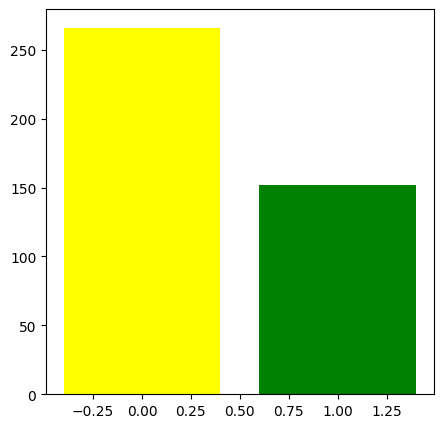

In [106]:
plt.figure(figsize=(5,5))
plt.bar(list(df['Survived'].value_counts().keys()),list(df['Survived'].value_counts()),color=["yellow","green"])
plt.show()

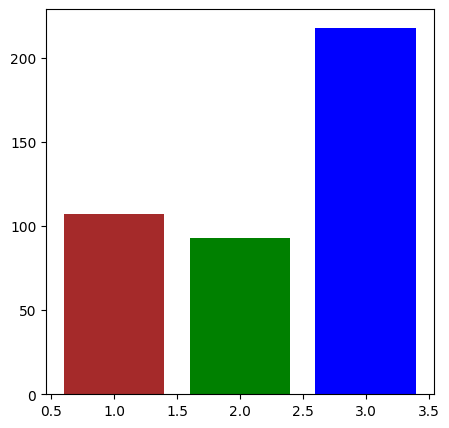

In [107]:
plt.figure(figsize=(5,5))
plt.bar(list(df['Pclass'].value_counts().keys()),list(df['Pclass'].value_counts()),color=["blue","brown","green"])
plt.show()

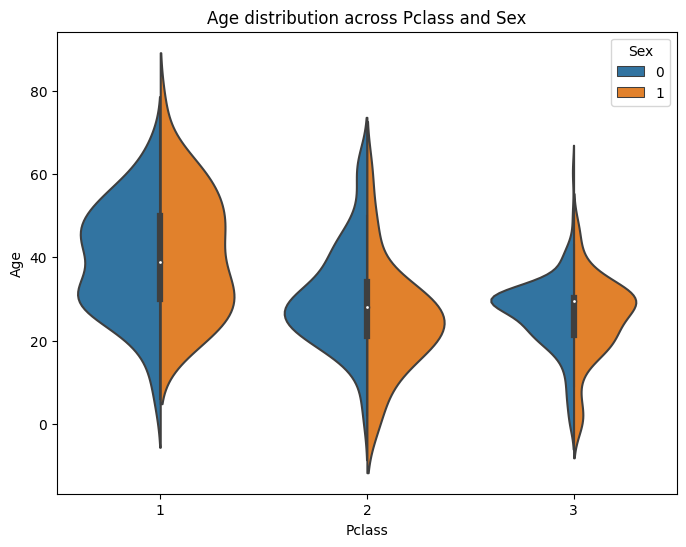

In [108]:
# To compare the distribution of Age for different Pclass and Sex
plt.figure(figsize=(8,6))
sns.violinplot(x='Pclass', y='Age', hue='Sex', split=True, data=df)
plt.title('Age distribution across Pclass and Sex')
plt.show()

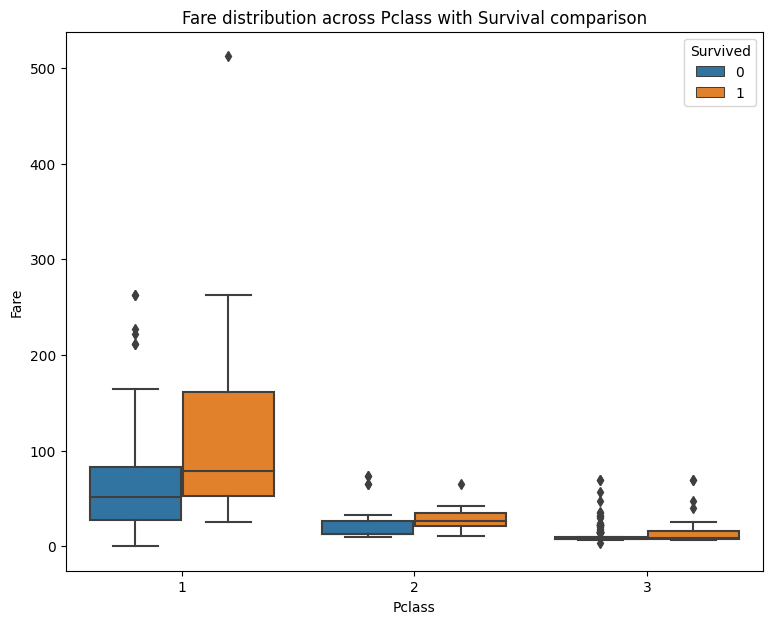

In [109]:
# compare the distribution of fore different Pclass with respect to
plt.figure(figsize=(9,7))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df)
plt.title('Fare distribution across Pclass with Survival comparison')
plt.show()

# Training Model

In [110]:
model = LogisticRegression(max_iter=1000)

In [111]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [112]:
# Accuracy on training data 
x_train_prediction = model.predict(X_train)
print(x_train_prediction)

[0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1
 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0
 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1
 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0
 1]
